In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV test data separetly into a DataFrame
data1 = pd.read_csv('results/re_aigenerated_13_1689444239068.csv')
data2 = pd.read_csv('results/2_aigenerated_13_experiment_1690070139873.csv')
# Concatenate the two test data
df = pd.concat([data1, data2], ignore_index=True)
df

,llm_model,temperature,system_prompt,user_prompt,score
0,openai/gpt-4-0613,0,aigenerated_13.txt,CONVERT_TEXT_TO_SPEECH.txt - 0,3
1,openai/gpt-4-0613,0,aigenerated_13.txt,CONVERT_TEXT_TO_SPEECH.txt - 1,3
2,openai/gpt-4-0613,0,aigenerated_13.txt,CONVERT_TEXT_TO_SPEECH.txt - 2,3
3,openai/gpt-4-0613,0,aigenerated_13.txt,CONVERT_TEXT_TO_SPEECH.txt - 3,3
4,openai/gpt-4-0613,0,aigenerated_13.txt,CONVERT_TEXT_TO_SPEECH.txt - 4,3
...,...,...,...,...,...
537,openai/gpt-4-0613,0,aigenerated_13.txt,SEND_EMAIL.txt - 15,3
538,openai/gpt-4-0613,0,aigenerated_13.txt,SEND_EMAIL.txt - 16,3
539,openai/gpt-4-0613,0,aigenerated_13.txt,SEND_EMAIL.txt - 17,3
540,openai/gpt-4-0613,0,aigenerated_13.txt,SEND_EMAIL.txt - 18,3


In [11]:
data1.head

<bound method NDFrame.head of              llm_model  temperature       system_prompt   
0    openai/gpt-4-0613            0  aigenerated_13.txt  \
1    openai/gpt-4-0613            0  aigenerated_13.txt   
2    openai/gpt-4-0613            0  aigenerated_13.txt   
3    openai/gpt-4-0613            0  aigenerated_13.txt   
4    openai/gpt-4-0613            0  aigenerated_13.txt   
..                 ...          ...                 ...   
216  openai/gpt-4-0613            0  aigenerated_13.txt   
217  openai/gpt-4-0613            0  aigenerated_13.txt   
218  openai/gpt-4-0613            0  aigenerated_13.txt   
219  openai/gpt-4-0613            0  aigenerated_13.txt   
220  openai/gpt-4-0613            0  aigenerated_13.txt   

                        user_prompt  score  
0    CONVERT_TEXT_TO_SPEECH.txt - 0      3  
1    CONVERT_TEXT_TO_SPEECH.txt - 1      3  
2    CONVERT_TEXT_TO_SPEECH.txt - 2      3  
3    CONVERT_TEXT_TO_SPEECH.txt - 3      3  
4    CONVERT_TEXT_TO_SPEECH.txt - 4 

In [12]:
data2.head

<bound method NDFrame.head of              llm_model  temperature       system_prompt   
0    openai/gpt-4-0613            0  aigenerated_13.txt  \
1    openai/gpt-4-0613            0  aigenerated_13.txt   
2    openai/gpt-4-0613            0  aigenerated_13.txt   
3    openai/gpt-4-0613            0  aigenerated_13.txt   
4    openai/gpt-4-0613            0  aigenerated_13.txt   
..                 ...          ...                 ...   
316  openai/gpt-4-0613            0  aigenerated_13.txt   
317  openai/gpt-4-0613            0  aigenerated_13.txt   
318  openai/gpt-4-0613            0  aigenerated_13.txt   
319  openai/gpt-4-0613            0  aigenerated_13.txt   
320  openai/gpt-4-0613            0  aigenerated_13.txt   

                        user_prompt  score  
0    CONVERT_TEXT_TO_SPEECH.txt - 0      3  
1    CONVERT_TEXT_TO_SPEECH.txt - 1      3  
2    CONVERT_TEXT_TO_SPEECH.txt - 2      3  
3    CONVERT_TEXT_TO_SPEECH.txt - 3      3  
4    CONVERT_TEXT_TO_SPEECH.txt - 4 

In [13]:
# filter and clean the data by excluding unwanted columns
df['user_prompt'] = df['user_prompt'].str.split('.').str[0]
filtered_df = df[['user_prompt', 'score']]
filtered_df

,user_prompt,score
0,CONVERT_TEXT_TO_SPEECH,3
1,CONVERT_TEXT_TO_SPEECH,3
2,CONVERT_TEXT_TO_SPEECH,3
3,CONVERT_TEXT_TO_SPEECH,3
4,CONVERT_TEXT_TO_SPEECH,3
...,...,...
537,SEND_EMAIL,3
538,SEND_EMAIL,3
539,SEND_EMAIL,3
540,SEND_EMAIL,3


In [14]:
# Identify the unique scores
unique_scores = [0, 1, 2, 3]  # the score is to confusion matrix as TP=3, FP=2, FN=1 and TN=0.

# Count the occurrences of each score for each user_prompt
summary_aigen13_zeroshot = df.groupby('user_prompt')['score'].value_counts().unstack()

# Ensure all scores are represented in the columns, filling with 0 where necessary
summary_aigen13_zeroshot = summary_aigen13_zeroshot.reindex(columns=unique_scores).fillna(0)

# Rename the columns as desired (cnfusion matrix)
summary_aigen13_zeroshot.columns = ['TN', 'FN', 'FP', 'TP']
summary_aigen13_zeroshot


,TN,FN,FP,TP
user_prompt,,,,
CONVERT_TEXT_TO_SPEECH,0.0,0.0,0.0,40.0
CREATE_CALENDAR_EVENT,0.0,0.0,23.0,17.0
CREATE_REMINDER,0.0,0.0,0.0,40.0
GENERATE_IMAGE,1.0,1.0,0.0,38.0
GET_CALENDAR_EVENTS,8.0,0.0,3.0,29.0
GET_CURRENT_DATE_AND_TIME,0.0,0.0,0.0,40.0
GET_CURRENT_STOCK_PRICE,1.0,0.0,0.0,39.0
GET_NEWS,10.0,0.0,0.0,30.0
GET_WEATHER,0.0,0.0,0.0,40.0


In [15]:
# Add a row for the cumulative sum of each column
sum_row = summary_aigen13_zeroshot.sum(numeric_only=True)
df_sum = pd.DataFrame([sum_row], index=["Cumulative"])
summary_aigen13_zeroshot = pd.concat([summary_aigen13_zeroshot, df_sum])
summary_aigen13_zeroshot.index.name = "APIs"

In [16]:
# Calculate Precision, Recall, and F1 Score
summary_aigen13_zeroshot['Precision'] = summary_aigen13_zeroshot['TP'] / (summary_aigen13_zeroshot['TP'] + summary_aigen13_zeroshot['FP'])
summary_aigen13_zeroshot['Recall'] = summary_aigen13_zeroshot['TP'] / (summary_aigen13_zeroshot['TP'] + summary_aigen13_zeroshot['FN'])
summary_aigen13_zeroshot['F1 Score'] = 2 * (summary_aigen13_zeroshot['Precision'] * summary_aigen13_zeroshot['Recall']) / (summary_aigen13_zeroshot['Precision'] + summary_aigen13_zeroshot['Recall'])

# Round to 2 decimal places
summary_aigen13_zeroshot['Precision'] = summary_aigen13_zeroshot['Precision'].round(2)
summary_aigen13_zeroshot['Recall'] = summary_aigen13_zeroshot['Recall'].round(2)
summary_aigen13_zeroshot['F1 Score'] = summary_aigen13_zeroshot['F1 Score'].round(2)

# Handle possible NaN values (caused by divisions by zero)
summary_aigen13_zeroshot.fillna(0, inplace=True)

# Stire the results summary in a csv file
summary_aigen13_zeroshot.to_csv('summary_aigen13_zeroshot.csv', index=True)

print(summary_aigen13_zeroshot)

                              TN   FN    FP     TP  Precision  Recall   
APIs                                                                    
CONVERT_TEXT_TO_SPEECH       0.0  0.0   0.0   40.0       1.00    1.00  \
CREATE_CALENDAR_EVENT        0.0  0.0  23.0   17.0       0.42    1.00   
CREATE_REMINDER              0.0  0.0   0.0   40.0       1.00    1.00   
GENERATE_IMAGE               1.0  1.0   0.0   38.0       1.00    0.97   
GET_CALENDAR_EVENTS          8.0  0.0   3.0   29.0       0.91    1.00   
GET_CURRENT_DATE_AND_TIME    0.0  0.0   0.0   40.0       1.00    1.00   
GET_CURRENT_STOCK_PRICE      1.0  0.0   0.0   39.0       1.00    1.00   
GET_NEWS                    10.0  0.0   0.0   30.0       1.00    1.00   
GET_WEATHER                  0.0  0.0   0.0   40.0       1.00    1.00   
NOT_AVAILABLE              127.0  0.0   6.0    9.0       0.60    1.00   
SEND_EMAIL                   0.0  0.0   0.0   40.0       1.00    1.00   
Cumulative                 147.0  1.0  32.0  362.0 

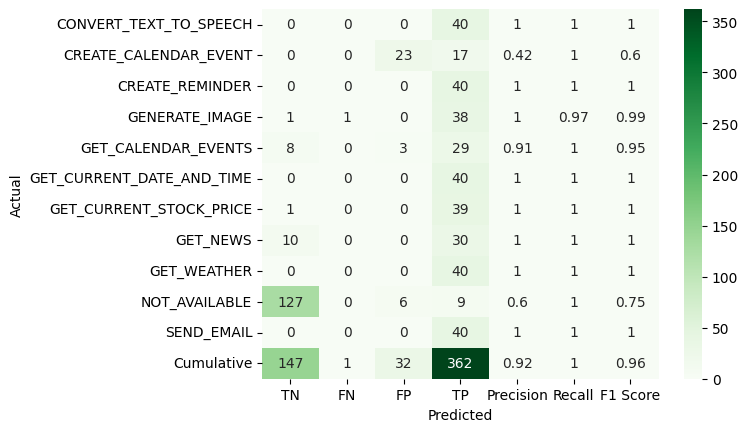

In [17]:
# Plot the confusion matrix
sns.heatmap(summary_aigen13_zeroshot, annot=True, cmap='Greens', fmt='g'), plt.xlabel('Predicted'), plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [18]:
# Generate the DataFrame to LaTeX format so that it can be copied and pasted into our thesis
# Formatting TN, FN, FP, and TP columns to 0 decimal places
for col in ['TN', 'FN', 'FP', 'TP']:
    summary_aigen13_zeroshot[col] = summary_aigen13_zeroshot[col].astype(int)

# Formatting the 'Precision', 'Recall', and 'F1 Score' columns to 2 decimal places
for col in ['Precision', 'Recall', 'F1 Score']:
    summary_aigen13_zeroshot[col] = summary_aigen13_zeroshot[col].round(2)

# Convert the DataFrame to LaTeX
latex_code = summary_aigen13_zeroshot.to_latex(float_format="%.2f")
print(latex_code)

\begin{tabular}{lrrrrrrr}
\toprule
 & TN & FN & FP & TP & Precision & Recall & F1 Score \\
APIs &  &  &  &  &  &  &  \\
\midrule
CONVERT_TEXT_TO_SPEECH & 0 & 0 & 0 & 40 & 1.00 & 1.00 & 1.00 \\
CREATE_CALENDAR_EVENT & 0 & 0 & 23 & 17 & 0.42 & 1.00 & 0.60 \\
CREATE_REMINDER & 0 & 0 & 0 & 40 & 1.00 & 1.00 & 1.00 \\
GENERATE_IMAGE & 1 & 1 & 0 & 38 & 1.00 & 0.97 & 0.99 \\
GET_CALENDAR_EVENTS & 8 & 0 & 3 & 29 & 0.91 & 1.00 & 0.95 \\
GET_CURRENT_DATE_AND_TIME & 0 & 0 & 0 & 40 & 1.00 & 1.00 & 1.00 \\
GET_CURRENT_STOCK_PRICE & 1 & 0 & 0 & 39 & 1.00 & 1.00 & 1.00 \\
GET_NEWS & 10 & 0 & 0 & 30 & 1.00 & 1.00 & 1.00 \\
GET_WEATHER & 0 & 0 & 0 & 40 & 1.00 & 1.00 & 1.00 \\
NOT_AVAILABLE & 127 & 0 & 6 & 9 & 0.60 & 1.00 & 0.75 \\
SEND_EMAIL & 0 & 0 & 0 & 40 & 1.00 & 1.00 & 1.00 \\
Cumulative & 147 & 1 & 32 & 362 & 0.92 & 1.00 & 0.96 \\
\bottomrule
\end{tabular}

